<a href="https://colab.research.google.com/github/teerasitk/01205415/blob/main/Descriptive_Statistics_for_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load all important Python libraries

## Install yfinance

In [1]:
!pip install yfinance

## load libraries

In [4]:
import yfinance  as yf# for yahoo dataset
import pandas as pd # handle dataframes
import numpy as np # array manupulation
import matplotlib.pyplot as plt  # plot graph
from scipy.stats import norm, lognorm # normal and lognormal distribution

# Return

## load bitcoin-usd data in 2022

In [5]:
btc = yf.download("BTC-USD", "2022-01-01", "2022-12-30")  # 2022 data
btc_close = btc.Close # only consider close price

[*********************100%%**********************]  1 of 1 completed


## simple Return:
$R_t(\tau) = \frac{P_t}{P_{t-\tau}} -1 $


In [8]:
Rt = btc_close.pct_change(1)
print("At t = 2022-12-01")
RDec1 = Rt["2022-12-01"]
print(f"R_t = {RDec1:0.3f}")
Rt_5 = btc_close.pct_change(5)
RDec1_5 = Rt_5["2022-12-01"]
print(f"R_t(5) = {RDec1_5:0.3f}")

At t = 2022-12-01
R_t = -0.012
R_t(5) = 0.031


## Anualized Simple Return:

$Annualized\;R_t = \left[\prod_{j=0}^{\tau -1}\left(1+R_{t-j}\right)\right]^{1/\tau} - 1 = \left(\frac{P_t}{P_0}\right)^{1/\tau} - 1$



In [12]:
btc5years = yf.download("BTC-USD", "2017-01-01", "2022-12-30") # over five years
btc5years.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [16]:
Pt = btc5years.Close.iloc[-1]
P0 = btc5years.Close.iloc[0]
print(f"P_5 = {Pt}, and P_0 = {P0}")
avg_R = (Pt/ P0) ** (1/5) -1
print(f"Annaulized Return: {avg_R*100:0.2f}%")

P_5 = 16642.341796875, and P_0 = 998.3250122070312
Annaulized Return: 75.55%


## log-return

$r_t = \log\left(\frac{P_t}{P_{t-1}}\right)$
and
$r_t(\tau) = \log\left(\frac{P_t}{P_{t-\tau}}\right)$

In [20]:
Rt = btc_close.pct_change(1)
rt = np.log(1 + Rt)
print("At t = 2022-12-01")
RDec1 = Rt["2022-12-01"]
rDec1 = rt ["2022-12-01"]
print(f"r_t = {rDec1:0.3f} and R_t={RDec1:0.3f}")
rt_5 = rt.rolling(window=5).sum() # 5 day moving sum
rDec1_5 = rt_5["2022-12-01"]
Rt_5 = btc_close.pct_change(5)
RDec1_5 = Rt_5["2022-12-01"]
print(f"r_t(5) = {rDec1_5:0.3f} and R_t(5) = {RDec1_5:0.3f}")


At t = 2022-12-01
r_t = -0.012 and R_t=-0.012
r_t(5) = 0.030 and R_t(5) = 0.031


## plot the difference between $R_t$ and $r_t$

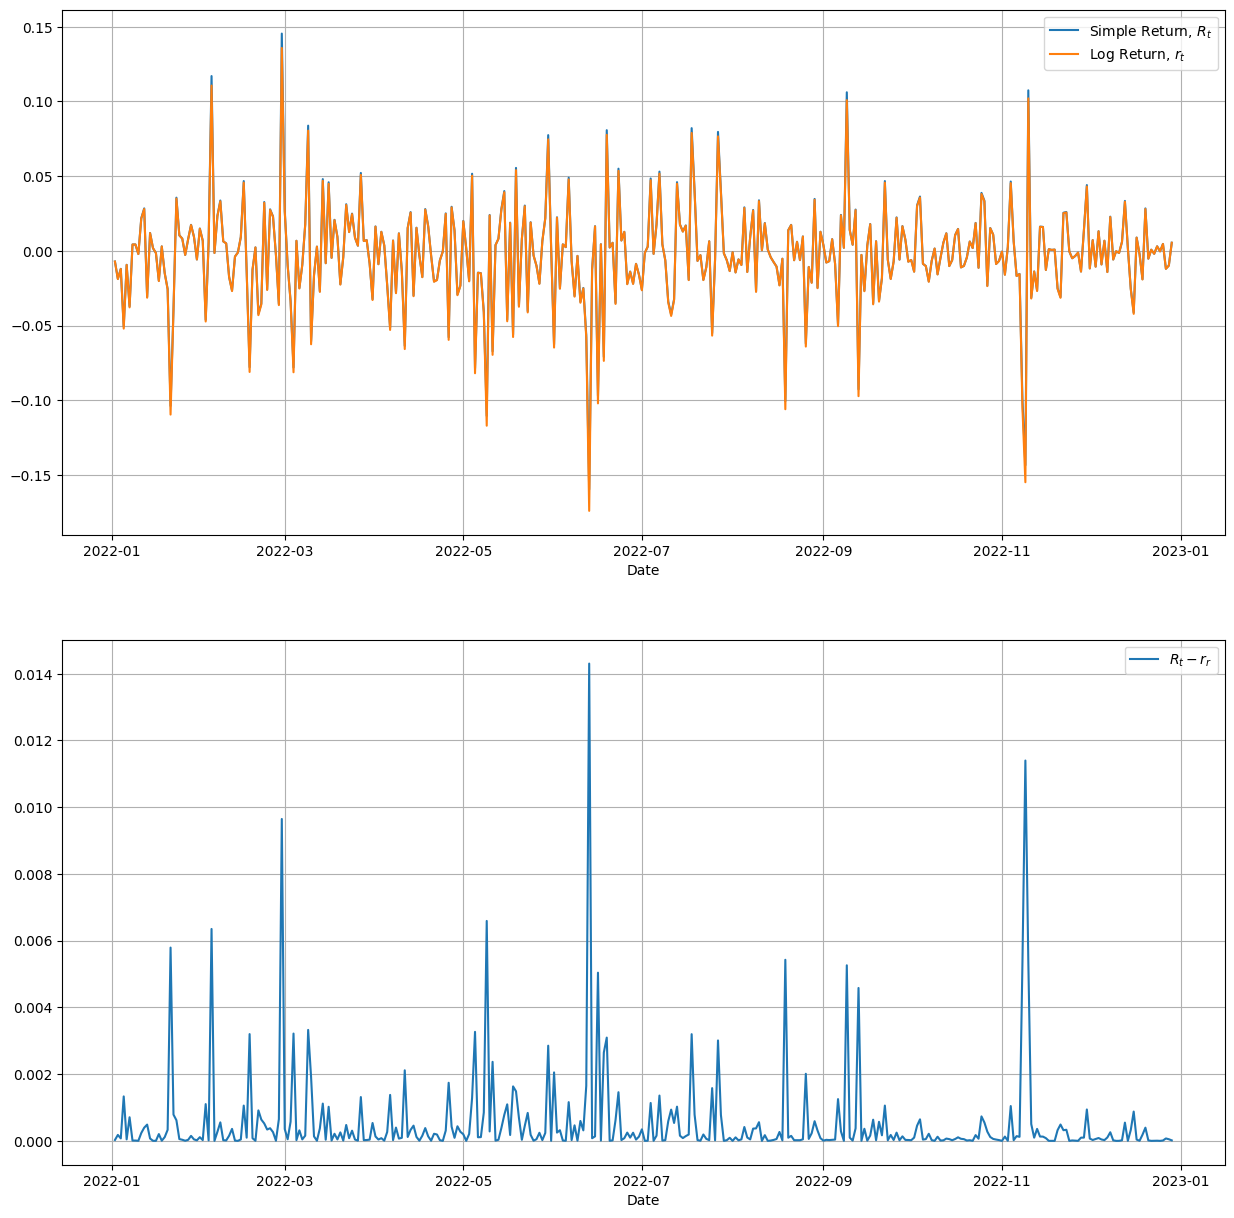

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.plot(Rt, label="Simple Return, $R_t$")
plt.plot(rt, label="Log Return, $r_t$")
plt.grid()
plt.xlabel("Date")
plt.legend()
plt.subplot(2,1,2)
plt.plot(Rt - rt, label="$R_t - r_r$")
plt.grid()
plt.xlabel("Date")
plt.legend()

# Descriptive Statistics

## Central Location
 - Mean

In [24]:
mean_Rt = Rt.mean()
mean_rt = rt.mean()
print(f"mean R_t = {mean_Rt:0.3f} vs mean r_t = {mean_rt:0.3f}")

mean R_t = -0.002 vs mean r_t = -0.003


## Spread:
 - standard deviation

In [25]:
std_Rt = Rt.std(ddof=1) # sample value always divided by n-1
std_rt = rt.std(ddof=1)
print(f"STD R_t = {std_Rt:0.3f} vs STD r_t = {std_rt:0.3f}")

STD R_t = 0.033 vs STD r_t = 0.034


## Converto Annum unit
In finance, we usually consider the return in the unit of year


*   Mean: Multiply by the number of day in a year
*   STD: Multiply by the square root of day in a year



In [26]:
day_in_year = 365
annual_mean = day_in_year * mean_rt
annual_std = np.sqrt(day_in_year ) * std_rt
print(f"annualized mean r_t = {annual_mean:0.3f} vs mean r_t = {mean_rt:0.3f}")
print(f"annualized STD r_t = {annual_std :0.3f} vs STD r_t = {std_rt:0.3f}")

annualized mean r_t = -1.061 vs mean r_t = -0.003
annualized STD r_t = 0.644 vs STD r_t = 0.034


## pandas also has building descriptive statistics

In [27]:
Rt.describe() # Simple Return

count    362.000000
mean      -0.002342
std        0.033354
min       -0.159747
25%       -0.015832
50%       -0.001559
75%        0.013096
max        0.145412
Name: Close, dtype: float64

In [28]:
rt.describe() # Log Return

count    362.000000
mean      -0.002908
std        0.033710
min       -0.174053
25%       -0.015959
50%       -0.001560
75%        0.013011
max        0.135764
Name: Close, dtype: float64

## Block plot is always helpful.

<Axes: >

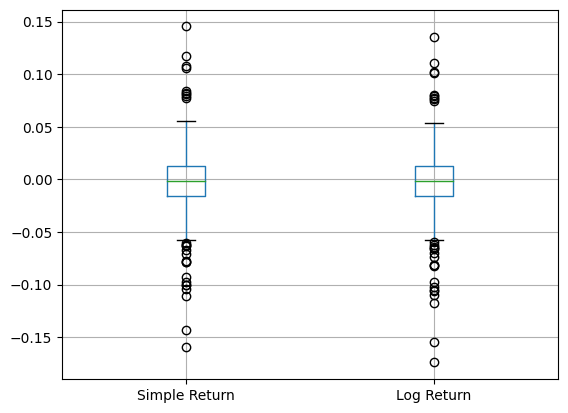

In [41]:
df = pd.DataFrame(columns=["Simple Return", "Log Return"])
df["Simple Return"] = Rt.dropna()
df["Log Return"] = rt.dropna()
df.boxplot()

## Statistics of a group of stocks

In [43]:
stock_list = ['ADVANC', 'AOT', 'AWC', 'BANPU', 'BBL', 'BDMS', 'BEM', 'BGRIM', 'BH','BLA', 'BTS', 'CBG', 'CPALL', 'CPF', 'CPN', 'CRC', 'EA', 'EGCO', 'GLOBAL', 'GPSC', 'GULF', 'HMPRO', 'INTUCH', 'IRPC', 'IVL', 'JMART', 'JMT', 'KBANK', 'KCE', 'KTB', 'KTC', 'LH', 'MINT', 'MTC','OR', 'OSP', 'PTT', 'PTTEP', 'PTTGC', 'SAWAD', 'SCC', 'SCGP','TIDLOR', 'TISCO', 'TOP', 'TRUE', 'TTB', 'TU']

In [48]:
return_in_2022 = dict()
for symbol in stock_list:
  ticker = yf.Ticker(symbol + ".BK")
  price = ticker.history(interval="1d",
                         start="2022-01-01",
                         end="2022-12-31").dropna()
  ret_2022 = price.Close.iloc[-1]/ price.Open.iloc[0] -1
  return_in_2022[symbol] = ret_2022
return_in_2022

{'ADVANC': -0.12177686309472091,
 'AOT': 0.2295082201546801,
 'AWC': 0.36075895374063816,
 'BANPU': 0.3646369235271847,
 'BBL': 0.24934228888933863,
 'BDMS': 0.28408804207249294,
 'BEM': 0.1707175529133984,
 'BGRIM': -0.015559122858848973,
 'BH': 0.5196271920024926,
 'BLA': -0.21607961452370117,
 'BTS': -0.06985050903231238,
 'CBG': -0.1838167315920871,
 'CPALL': 0.16747405857595576,
 'CPF': -0.03031320099482937,
 'CPN': 0.2930103578002001,
 'CRC': 0.4451543611759812,
 'EA': 0.006124541335055023,
 'EGCO': 0.014215261144014057,
 'GLOBAL': 0.18361164758735038,
 'GPSC': -0.16627689861614747,
 'GULF': 0.20509434883418365,
 'HMPRO': 0.07322948115392847,
 'INTUCH': -0.00014322278600298333,
 'IRPC': -0.17839179838571328,
 'IVL': -0.03788584690125418,
 'JMART': -0.2787841571357845,
 'JMT': 0.015383762206158336,
 'KBANK': 0.053526813158550235,
 'KCE': -0.45371048014119186,
 'KTB': 0.3637565438564656,
 'KTC': 0.008693167274195446,
 'LH': 0.1754195754633936,
 'MINT': 0.11206896158760027,
 'MTC': 

## compute mean and std of a group of stocks
$\bar{x} = \frac{1}{N}\sum_{i=1}^{N}{R_i}$

$s^2 = \frac{1}{N}\sum_{i=1}^{N}{R_i^2} - \left(\bar{x}\right)^2$ for $ n > 30$

In [51]:
sum_x = 0
sum_x_sq = 0
n = len(stock_list)
for symbol, ret in return_in_2022.items():
  sum_x += ret
  sum_x_sq += ret ** 2
mean = sum_x / n
mean_sq = sum_x_sq / n
variance = mean_sq - (mean **2)
std = np.sqrt(variance)
print(f"R_bar = {mean: 0.3f}, std = {std: 0.3f}")

R_bar =  0.040, std =  0.222


## compute z-score
$z_i=\frac{R_i - \bar{R}}{s_R}$

In [53]:
z_scores = {sym: (R-mean) / std for sym, R in return_in_2022.items()}
z_scores

{'ADVANC': -0.7311104579514337,
 'AOT': 0.8522667240419257,
 'AWC': 1.4438643368911752,
 'BANPU': 1.4613438404774919,
 'BBL': 0.9416665117301773,
 'BDMS': 1.0982790050717188,
 'BEM': 0.5872745411603071,
 'BGRIM': -0.25234618861018954,
 'BH': 2.1599446813238865,
 'BLA': -1.1561692831957406,
 'BTS': -0.49705837863739966,
 'CBG': -1.0107480424567126,
 'CPALL': 0.5726548628172186,
 'CPF': -0.3188485019044684,
 'CPN': 1.1384953188505824,
 'CRC': 1.8242669465382295,
 'EA': -0.15460956173993212,
 'EGCO': -0.11814157108997829,
 'GLOBAL': 0.645393192542674,
 'GPSC': -0.931689259051554,
 'GULF': 0.7422240020014018,
 'HMPRO': 0.14785825023034171,
 'INTUCH': -0.18286078891872476,
 'IRPC': -0.9862957788611303,
 'IVL': -0.35298133391839054,
 'JMART': -1.4388028099624153,
 'JMT': -0.11287468670701493,
 'KBANK': 0.059050736288384614,
 'KCE': -2.2272631277611055,
 'KTB': 1.4573756301873961,
 'KTC': -0.1430317752211015,
 'LH': 0.6084683679690442,
 'MINT': 0.3229227491561108,
 'MTC': -1.7632537416109015,

## Sort from smallest to largest

In [56]:
sorted(z_scores.values())

[-2.2272631277611055,
 -1.7632537416109015,
 -1.4388028099624153,
 -1.1561692831957406,
 -1.0226880782562033,
 -1.0107480424567126,
 -0.9862957788611303,
 -0.9377504643291583,
 -0.931689259051554,
 -0.9001224590900634,
 -0.8748625309287924,
 -0.7630119120601082,
 -0.7311104579514337,
 -0.6348953536660185,
 -0.6275807765183996,
 -0.5443038851546093,
 -0.5426509353174996,
 -0.49705837863739966,
 -0.35298133391839054,
 -0.3188485019044684,
 -0.25234618861018954,
 -0.2279509652074638,
 -0.18286078891872476,
 -0.15460956173993212,
 -0.1430317752211015,
 -0.11814157108997829,
 -0.11287468670701493,
 -0.07959331414954819,
 0.059050736288384614,
 0.14785825023034171,
 0.2794069288828596,
 0.3229227491561108,
 0.5726548628172186,
 0.5872745411603071,
 0.6084683679690442,
 0.645393192542674,
 0.7422240020014018,
 0.8226312261023965,
 0.8522667240419257,
 0.9416665117301773,
 1.0982790050717188,
 1.1384953188505824,
 1.4438643368911752,
 1.4573756301873961,
 1.4613438404774919,
 1.824266946538229

In [58]:
sorted(z_scores.items(), key = lambda item: item[1])

[('KCE', -2.2272631277611055),
 ('MTC', -1.7632537416109015),
 ('JMART', -1.4388028099624153),
 ('BLA', -1.1561692831957406),
 ('SAWAD', -1.0226880782562033),
 ('CBG', -1.0107480424567126),
 ('IRPC', -0.9862957788611303),
 ('SCGP', -0.9377504643291583),
 ('GPSC', -0.931689259051554),
 ('PTTGC', -0.9001224590900634),
 ('OSP', -0.8748625309287924),
 ('TIDLOR', -0.7630119120601082),
 ('ADVANC', -0.7311104579514337),
 ('OR', -0.6348953536660185),
 ('TU', -0.6275807765183996),
 ('PTT', -0.5443038851546093),
 ('SCC', -0.5426509353174996),
 ('BTS', -0.49705837863739966),
 ('IVL', -0.35298133391839054),
 ('CPF', -0.3188485019044684),
 ('BGRIM', -0.25234618861018954),
 ('TTB', -0.2279509652074638),
 ('INTUCH', -0.18286078891872476),
 ('EA', -0.15460956173993212),
 ('KTC', -0.1430317752211015),
 ('EGCO', -0.11814157108997829),
 ('JMT', -0.11287468670701493),
 ('TRUE', -0.07959331414954819),
 ('KBANK', 0.059050736288384614),
 ('HMPRO', 0.14785825023034171),
 ('TISCO', 0.2794069288828596),
 ('MINT

In [59]:
sorted_z_scores = {sym: val for sym, val in sorted(z_scores.items(), key = lambda item: item[1])}
sorted_z_scores

{'KCE': -2.2272631277611055,
 'MTC': -1.7632537416109015,
 'JMART': -1.4388028099624153,
 'BLA': -1.1561692831957406,
 'SAWAD': -1.0226880782562033,
 'CBG': -1.0107480424567126,
 'IRPC': -0.9862957788611303,
 'SCGP': -0.9377504643291583,
 'GPSC': -0.931689259051554,
 'PTTGC': -0.9001224590900634,
 'OSP': -0.8748625309287924,
 'TIDLOR': -0.7630119120601082,
 'ADVANC': -0.7311104579514337,
 'OR': -0.6348953536660185,
 'TU': -0.6275807765183996,
 'PTT': -0.5443038851546093,
 'SCC': -0.5426509353174996,
 'BTS': -0.49705837863739966,
 'IVL': -0.35298133391839054,
 'CPF': -0.3188485019044684,
 'BGRIM': -0.25234618861018954,
 'TTB': -0.2279509652074638,
 'INTUCH': -0.18286078891872476,
 'EA': -0.15460956173993212,
 'KTC': -0.1430317752211015,
 'EGCO': -0.11814157108997829,
 'JMT': -0.11287468670701493,
 'TRUE': -0.07959331414954819,
 'KBANK': 0.059050736288384614,
 'HMPRO': 0.14785825023034171,
 'TISCO': 0.2794069288828596,
 'MINT': 0.3229227491561108,
 'CPALL': 0.5726548628172186,
 'BEM': 0.

## Determining the outliers

In this case,
$p-value = Pr\left[Z \leq -|z-score|\right]\times 2.0$


where $Z$ is $N(0,1)$

In [61]:
for sym, z_score in sorted_z_scores.items(): #key, values
  p_val = 2.0*norm.cdf(-np.abs(z_score))
  print(f"{sym}: {p_val}")

KCE: 0.025929693281700066
MTC: 0.07785770340784502
JMART: 0.1502064000368972
BLA: 0.2476119213419231
SAWAD: 0.3064553499221183
CBG: 0.31213703664398273
IRPC: 0.32398799054824234
SCGP: 0.3483726631926817
GPSC: 0.35149713896138424
PTTGC: 0.3680550851696338
OSP: 0.3816487084994278
TIDLOR: 0.44545629176836177
ADVANC: 0.464711687009846
OR: 0.5254966676159061
TU: 0.53027860505102
PTT: 0.5862323738474162
SCC: 0.5873701620347092
BTS: 0.6191478842156661
IVL: 0.7241024343510261
CPF: 0.749841397062093
BGRIM: 0.8007734896442749
TTB: 0.8196843610272554
INTUCH: 0.8549072499808744
EA: 0.877129131468209
KTC: 0.8862650861923428
EGCO: 0.9059554851118669
JMT: 0.9101299051351234
TRUE: 0.9365607128829209
KBANK: 0.9529116968698449
HMPRO: 0.8824546374555977
TISCO: 0.7799325542678742
MINT: 0.7467537471950869
CPALL: 0.5668784049012179
BEM: 0.5570193366887286
LH: 0.5428768793104982
GLOBAL: 0.5186724137823004
GULF: 0.4579516285416062
TOP: 0.4107177357167905
AOT: 0.3940660705466491
BBL: 0.34636340543229405
BDMS: 

# Gaussian Test

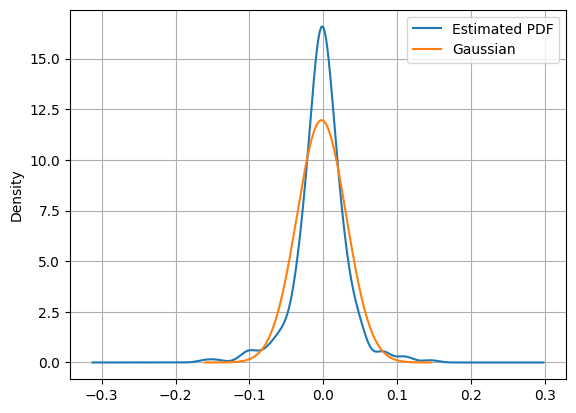

In [63]:
simple_ret = btc.Close.pct_change(1).dropna()
ax = simple_ret.plot.kde()
mu = simple_ret.mean()
std = simple_ret.std(ddof=1)
x = np.linspace(simple_ret.min(), simple_ret.max(), 10000)
pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, pdf)
plt.grid()
plt.legend(["Estimated PDF", "Gaussian"])


## Shapiro test for Normality of the data.

In [65]:
from scipy.stats import shapiro
stat,p_value = shapiro(simple_ret)
print(f"The Shapiro-Wilk test yields statistics: {stat:0.2f} with the p-value: {p_value:0.5f}")


The Shapiro-Wilk test yields statistics: 0.93 with the p-value: 0.00000


# Forecast the confidence interval to Future prices

Assume that an asset price at $t=0$ is $P_0$. The $(1-\alpha)\%$ confidence interval at $t=T$ is given as

$P_0e^{\mu_r T - z\sigma_r \sqrt{T}} \leq P_T \leq P_0e^{\mu_r T + z\sigma_r \sqrt{T}}$

where $\mu_r = \bar{r_t}$ and $\sigma_r = \sqrt{Var[r_t]}$.

### compute confidence interval of BTC prices for Jan 2023.

#### load data in 2022

Text(0.5, 0, 'Date')

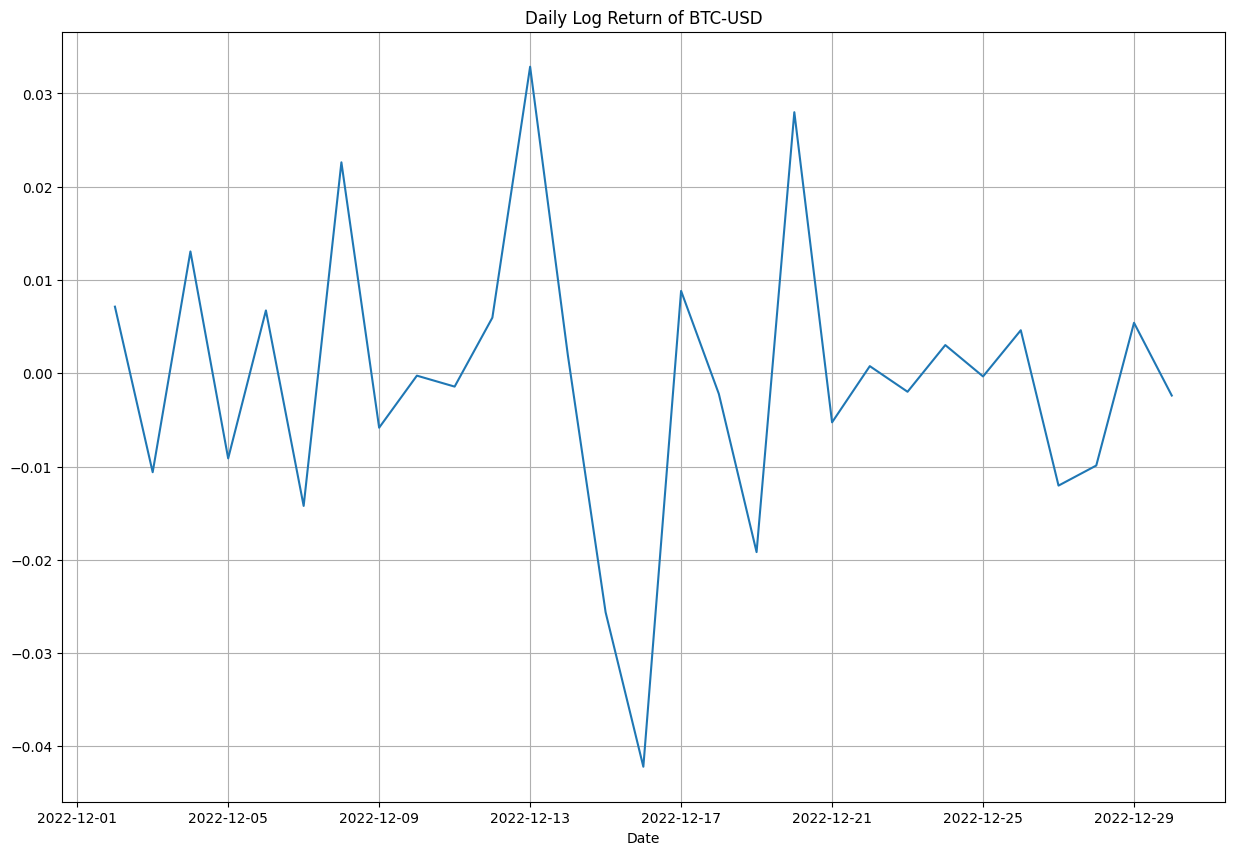

In [73]:
ticker = yf.Ticker("BTC-USD")
hist = ticker.history(start="2022-12-01", end="2022-12-31").Close
log_ret = np.log(hist.pct_change(1) + 1).dropna()
plt.figure(figsize=(15,10))
plt.plot(log_ret)
plt.grid()
plt.title("Daily Log Return of BTC-USD")
plt.xlabel("Date")

#### Compute $\mu_r$ and $\sigma_r$

In [74]:
mu_r = log_ret.mean()
sigma_r = log_ret.std(ddof=1)
print(f"mu_r = {mu_r:0.3f} and sigma_r = {sigma_r:0.3f}")

mu_r = -0.001 and sigma_r = 0.015


In [81]:
hist.tail()

Date
2022-12-26 00:00:00+00:00    16919.804688
2022-12-27 00:00:00+00:00    16717.173828
2022-12-28 00:00:00+00:00    16552.572266
2022-12-29 00:00:00+00:00    16642.341797
2022-12-30 00:00:00+00:00    16602.585938
Name: Close, dtype: float64

#### Determine the offset days from the end of historical data

In [82]:
P0 = hist.iloc[-1]
P_Jan_2023 = ticker.history(start="2023-01-01", end="2023-01-31").Close
T = P_Jan_2023.index - hist.index[-1]
print(T)
T = T.days
print(T)

TimedeltaIndex([ '2 days',  '3 days',  '4 days',  '5 days',  '6 days',
                 '7 days',  '8 days',  '9 days', '10 days', '11 days',
                '12 days', '13 days', '14 days', '15 days', '16 days',
                '17 days', '18 days', '19 days', '20 days', '21 days',
                '22 days', '23 days', '24 days', '25 days', '26 days',
                '27 days', '28 days', '29 days', '30 days', '31 days'],
               dtype='timedelta64[ns]', name='Date', freq=None)
Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date')


#### Find lower and upper bound prices

In [89]:
alpha = 0.05 # 95% confidence interval
z = norm.ppf(1-alpha/2) # compute z
print(f"z(1-alpha/2) = {z:0.3f}") # print x
P_low = P0 * np.exp(mu_r * T - z * sigma_r *np.sqrt(T)) # lower bound
P_high = P0 * np.exp(mu_r * T + z * sigma_r *np.sqrt(T)) # upper bound
df = pd.DataFrame() # build empty data frame
df["lower bournd"] = P_low  # assign P_low to lower bound column
df["uuper bournd"] = P_high # assign P_high to upper bound column
df["Actual Price"] = P_Jan_2023.values # assign actual price in Actual price Column
df["Date"] = P_Jan_2023.index # add date as another colume
df = df.set_index("Date") # make Date as index column
df.head()


z(1-alpha/2) = 1.960


,lower bournd,uuper bournd,Actual Price
Date,,,
2023-01-01 00:00:00+00:00,15901.181635,17283.074825,16625.080078
2023-01-02 00:00:00+00:00,15741.176647,17432.620804,16688.470703
2023-01-03 00:00:00+00:00,15605.703009,17557.634573,16679.857422
2023-01-04 00:00:00+00:00,15485.934717,17666.942142,16863.238281
2023-01-05 00:00:00+00:00,15377.342374,17765.072914,16836.736328


#### plot prices

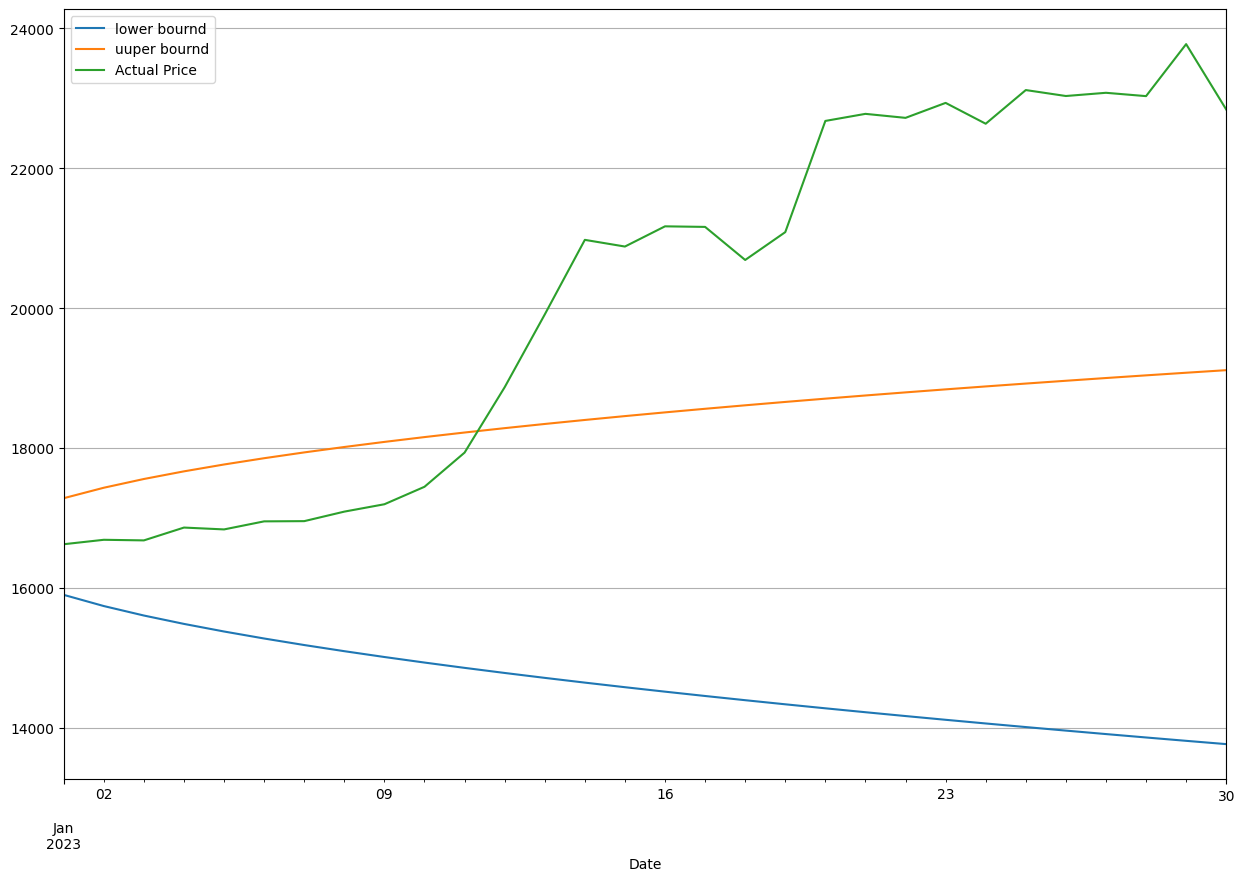

In [94]:
fig, ax = plt.subplots(1, figsize=(15,10))
df.plot(ax=ax)
ax.grid()

# Self and amoung stock statistical relationship

## Covariance amoung stocks

In [95]:
names =["ADVANC", "INTUCH", "SCB", "KBANK", "KCE", "DELTA"]
log_rets = dict() # create empty dict
for name in names: # for each symbol
  df = yf.download(name + ".BK", start="2022-01-01", end="2022-12-31") # load 2022 data
  ret = df['Adj Close'].pct_change(1).dropna() # compute simple retunr from adjusted close pice
  log_ret = np.log(ret + 1) # change to log return
  log_rets[name] = log_ret # assign to log_rets by symbol
log_rets['Date'] =log_ret.index # set date as another symbol
set6 = pd.DataFrame(log_rets) # make it dataframe
set6 = set6.set_index("Date") # set date as index
print(set6.cov()) # compute covariance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
          ADVANC    INTUCH       SCB     KBANK       KCE     DELTA
ADVANC  0.000141  0.000068  0.000044  0.000047  0.000050  0.000062
INTUCH  0.000068  0.000106  0.000029  0.000018  0.000031  0.000047
SCB     0.000044  0.000029  0.000942  0.000091  0.000068  0.000085
KBANK   0.000047  0.000018  0.000091  0.000151  0.000072  0.000058
KCE     0.000050  0.000031  0.000068  0.000072  0.000604  0.000431
DELTA   0.000062  0.000047  0.000085  0.000058  0.000431  0.001584


## auto-correlation function $\rho(h)$

In [98]:
auto_corr = {}
for name in names: # for each symbol
  df = yf.download(name + ".BK", start="2022-01-01", end="2022-12-31") # load data
  ret = df['Adj Close'].pct_change(1).dropna() # compute simple return
  log_ret = np.log(ret + 1) # change to log-return
  rho = [1] #rho[0] always = 1
  for h in range(1, 11): # for lag 1 to 10
    rho.append(log_ret.autocorr(lag=h)) # compute g
  auto_corr[name] = rho # assine back based on symbol
auto_corr["lag"] = np.arange(0,11) # lag from 0 to 10
auto_corr = pd.DataFrame(auto_corr) # change to dataframe
auto_corr = auto_corr.set_index("lag") # lag as index
auto_corr


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,ADVANC,INTUCH,SCB,KBANK,KCE,DELTA
lag,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.027692,-0.048483,-0.020800,0.067995,0.098532,0.008433
2,-0.068491,-0.077917,-0.023069,-0.095297,0.023999,-0.047913
3,-0.051187,0.123878,0.072178,0.058612,0.002552,0.009552
4,0.022248,0.085321,-0.066500,0.074312,0.026062,0.079880
5,-0.034414,-0.036093,-0.129955,-0.122967,0.014154,-0.031585
6,-0.015493,0.019436,-0.149111,0.004453,-0.079087,-0.081422
7,0.035007,-0.007167,0.174408,0.036125,-0.099855,0.091907
8,-0.101350,-0.014203,0.042986,-0.040426,0.054959,0.026247


## Change to Auto-Covariance using the equation:


$\gamma(h) = \sigma^2 * \rho(h)$

In [100]:
auto_cov = auto_corr.copy() # copy to auto covariance
for name in names: # for each symbol
  df = yf.download(name + ".BK", start="2022-01-01", end="2022-12-31") # load data
  ret = df['Adj Close'].pct_change(1).dropna() # compute simple return
  log_ret = np.log(ret + 1) # change to log-return
  auto_cov[name] = auto_cov[name] * log_ret.var(ddof=1)
auto_cov

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,ADVANC,INTUCH,SCB,KBANK,KCE,DELTA
lag,,,,,,
0,0.000141,1.055317e-04,0.000942,1.514167e-04,0.000604,0.001584
1,-0.000004,-5.116527e-06,-0.000020,1.029552e-05,0.000060,0.000013
2,-0.000010,-8.222727e-06,-0.000022,-1.442961e-05,0.000015,-0.000076
3,-0.000007,1.307301e-05,0.000068,8.874764e-06,0.000002,0.000015
4,0.000003,9.004066e-06,-0.000063,1.125207e-05,0.000016,0.000127
5,-0.000005,-3.808981e-06,-0.000122,-1.861928e-05,0.000009,-0.000050
6,-0.000002,2.051079e-06,-0.000141,6.742182e-07,-0.000048,-0.000129
7,0.000005,-7.563679e-07,0.000164,5.469925e-06,-0.000060,0.000146
8,-0.000014,-1.498882e-06,0.000041,-6.121197e-06,0.000033,0.000042


## Use the minimum mean square error estimate to forecast one step ($h=1$) bitcoin price from two historical prices ($p=2$).

In [104]:
df = yf.download("BTC-USD", start="2022-07-01", end="2022-12-31") # 6 month data
ret = df['Close'].pct_change(1).dropna() # simple return
log_ret = np.log(ret + 1) # log retirn
rho = [1] #rho[0] always = 1
for h in [1,2,3]: # we need only lag 1, lag 2, lag 3 = p+1
  rho.append(log_ret.autocorr(lag=h))
rho = np.array(rho) # change to numpy array
gamma0 = log_ret.var(ddof=1)
gamma = rho*gamma0 # auto covirance
print(gamma)
print(gamma * 1_000_000)

[*********************100%%**********************]  1 of 1 completed
[ 8.71399081e-04  5.06814076e-06 -3.72112050e-05 -2.96817565e-05]
[871.39908084   5.06814076 -37.21120501 -29.68175651]


## build Equation

In [111]:
gamm2 = gamma * 1_000_000
b = [gamm2[1], gamm2[2], gamm2[3]]
A = [[gamm2[0], gamm2[1], gamm2[2]],
    [gamm2[1], gamm2[0], gamm2[1]],
     [gamm2[2], gamm2[1], gamm2[0]]]
print("A=", A)
print("b=", b)



A= [[871.3990808393172, 5.06814076181222, -37.21120501299945], [5.06814076181222, 871.3990808393172, 5.06814076181222], [-37.21120501299945, 5.06814076181222, 871.3990808393172]]
b= [5.06814076181222, -37.21120501299945, -29.681756507136203]


In [112]:
al = np.linalg.solve(A,b) # use numpy.linagl.solve for
# solving Ax=b
print(f"alpha[0] = {al[0]:0.4f}")
print(f"alpha[1] = {al[1]:0.4f}")
print(f"alpha[2] = {al[2]:0.4f}")

alpha[0] = 0.0046
alpha[1] = -0.0425
alpha[2] = -0.0336


# volatilities

# simple approach

In [113]:
df = yf.download("BTC-USD", start="2022-01-01", end="2022-12-31")

[*********************100%%**********************]  1 of 1 completed


In [114]:
price = df.Close
ret = price.pct_change(1)
log_ret =  np.log(price) - np.log(price.shift(1))
ret = ret.dropna()
log_ret = log_ret.dropna()
day_in_year = 365
print(f"Annualized Simple Return Mean: {day_in_year * ret.mean() * 100:0.3f}%")
print(f"Annualized Log Return Mean: {day_in_year * log_ret.mean()*100:0.3f}%")

Annualized Simple Return Mean: -85.495%
Annualized Log Return Mean: -106.091%


## volatility using STD on close price

In [115]:
vol_ret = ret.std(ddof=1) * np.sqrt(day_in_year)
vol_log_ret = log_ret.std(ddof=1) * np.sqrt(day_in_year)
print(f"Annualized Volatility of Simple Return Mean: {vol_ret * 100:0.3f}%")
print(f"Annualized Volatility of  Log Return Mean: {vol_log_ret*100:0.3f}%")

Annualized Volatility of Simple Return Mean: 63.634%
Annualized Volatility of  Log Return Mean: 64.313%


## Range Volatility

In [116]:
high = df.High
low  = df.Low
vol_range = (np.log(high/low)**2).mean()
vol_range = vol_range/(4*np.log(2))
vol_range = np.sqrt(vol_range)
vol_range = np.sqrt(day_in_year) * vol_range
print(f"Annualized Range Volatility of Price: {vol_range * 100:0.3f}%")

Annualized Range Volatility of Price: 58.363%


## German and Klass Volatility

In [117]:
high = df.High
low = df.Low
open = df.Open
close = df.Close
term1 = (np.log(high/low)**2)
term2 = (np.log(close/open)**2)
sum = 0.5*term1  - (2*np.log(2) - 1)*term2
vol_gk = np.sqrt(sum.mean())
vol_gk = np.sqrt(day_in_year) * vol_gk
print(f"Annualized Garman and Klass Volatility of Price: {vol_gk * 100:0.3f}%")

Annualized Garman and Klass Volatility of Price: 55.849%


## EWMA Volatility

$\sigma_{ewma}^2 = (1 - \lambda) \sum_{k=1}^{m} {\lambda^{k-1} r_{t-k}^2}$

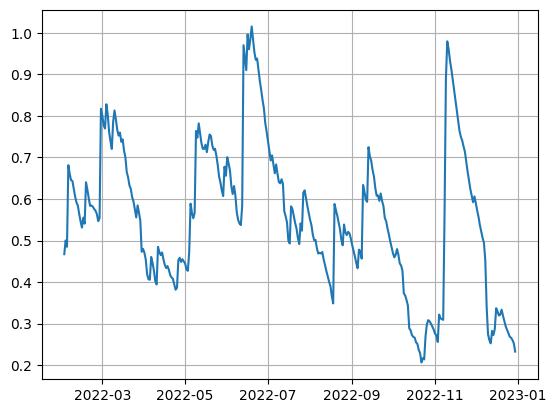

In [120]:
m = 30
lamb = 0.94 # lambda
lamb_k = lamb ** np.arange(m, 0, -1) # lambda ^ {k-1}
vol = []
vol_ewma = []
date_out  = []
for cnt, date in enumerate(log_ret.index):
  vol_t = (log_ret[date]) ** 2
  vol.append(vol_t)
  if cnt >= m:
    vol_t = np.array(vol)[-m:]
    vol_t = vol_t * lamb_k
    vol_ewma.append(np.sqrt(day_in_year * vol_t.sum() * (1  - lamb)))
    # change to annual vol
    date_out.append(date)

plt.plot(date_out, vol_ewma)
plt.grid()
